In [91]:
#import albumentations
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 
from PIL import Image
import re

import torch 
import torchvision

In [19]:
# Model imports 

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SequentialSampler

In [8]:
DATA_PATH = 'data/smartwarehouseyolo/SmartWarehouseYOLO/'

In [13]:
len(os.listdir(os.path.join(DATA_PATH, 'data')))

1998

In [28]:
with open(os.path.join(DATA_PATH, 'smartwarehouse_train.txt'), 'r') as trainfile:
    file = trainfile.read()

In [76]:
file = open(os.path.join(DATA_PATH, 'data/000002.txt'), 'r')
_res = list()
for line in file:
    line  = re.sub('\n', ' ', line)
    line[2:-1].split(' ')
    _res.append(line[2:-1].split(' '))

In [106]:
def get_boxes(txt_file):
    file = open(txt_file, 'r')
    _res = list()
    for line in file:
        line = re.sub('\n', ' ', line)
        line = [float(el) for el in line[2:-1].split(' ')]
        _res.append(line )
    return _res        

In [83]:
class SmartWareHouseDataset(Dataset):
    
    def __init__(self,  image_dir, transforms=None):
        super().__init__()
        self.txt_file = txt_file
        self.image_dir = image_dir 
        self.transforms = transforms
        self.image_ids = [ f'{el:06}' for el in range(1000)]
    
    def __getitem__(self, index: int):
        image_id = self.image_ids[index]
        image =  cv2.imread(os.path.join(self.image_dir, f'{image_id}.jpg'))
        # Convert image 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0
        
        
        box = get_boxes(os.path.join(self.image_dir, f'{image_id}.txt'))
        n_boxes = len(box)
        assert n_boxes > 0, 'There are no boxes on provided image'
        
        if self.transforms:
            sample = {
                'image' : image,
            }
            sample = self.transforms(**sample)
            image = sample['image']
        return image, image_id, box 
    

In [84]:
# Model pretrained on coco 
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = False, pretrained_backbone=False)

##### Example image


In [85]:
img = cv2.imread(os.path.join(DATA_PATH, 'data/000002.jpg'))

In [107]:
boxes = get_boxes(os.path.join(DATA_PATH, 'data/000002.txt'))

In [108]:
boxes

[[0.500759548611111,
  0.35085227272727276,
  0.3973524305555555,
  0.33712121212121215],
 [0.30805121527777773,
  0.3709753787878788,
  0.17903645833333331,
  0.2911931818181818],
 [0.23893229166666666,
  0.39607007575757575,
  0.1736111111111111,
  0.243844696969697],
 [0.23969184027777776,
  0.6493844696969697,
  0.18294270833333331,
  0.25142045454545453],
 [0.2981770833333333,
  0.6586174242424243,
  0.1618923611111111,
  0.26988636363636365],
 [0.4983723958333333,
  0.6766098484848485,
  0.3938802083333333,
  0.3172348484848485]]

In [115]:
img.shape[:-1]

(4608, 2112)

In [116]:
def get_coords(boxes, img):
    n_boxes = len(boxes)
    for box in boxes:
        for coords in range(len(box)):
            (x, y) = [el * box[coords] for el in img.shape[:2]]
            
    
    (x1, y1) = [el * boxes[0][0] for el in img.shape[:2]]
    (x2, y2) = 
    y1 = 
    y2 = 
    

[2307.4999999999995, 1057.6041666666665]

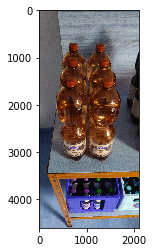

In [93]:
plt.imshow(img)

In [96]:
img.shape

(4608, 2112, 3)

In [103]:

[float(el) for item in boxes for el in item]

[0.500759548611111,
 0.35085227272727276,
 0.3973524305555555,
 0.33712121212121215,
 0.30805121527777773,
 0.3709753787878788,
 0.17903645833333331,
 0.2911931818181818,
 0.23893229166666666,
 0.39607007575757575,
 0.1736111111111111,
 0.243844696969697,
 0.23969184027777776,
 0.6493844696969697,
 0.18294270833333331,
 0.25142045454545453,
 0.2981770833333333,
 0.6586174242424243,
 0.1618923611111111,
 0.26988636363636365,
 0.4983723958333333,
 0.6766098484848485,
 0.3938802083333333,
 0.3172348484848485]